<h1>Heritage Health</h1>

In [65]:
#Importing libraries

import numpy as np
import pandas as pd

<h2>Initial Data Exploration</h2>

We are gonna take first take a look at the claims table and do some preprocessing.

In [66]:
claims = pd.read_csv("HeritageHealth/HHP_release3/claims.csv")

In [67]:
claims.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [68]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MemberID               int64  
 1   ProviderID             float64
 2   Vendor                 float64
 3   PCP                    float64
 4   Year                   object 
 5   Specialty              object 
 6   PlaceSvc               object 
 7   PayDelay               object 
 8   LengthOfStay           object 
 9   DSFS                   object 
 10  PrimaryConditionGroup  object 
 11  CharlsonIndex          object 
 12  ProcedureGroup         object 
 13  SupLOS                 int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB


In [69]:
claims["LengthOfStay"].unique()

array([nan, '1 day', '2- 4 weeks', '2 days', '3 days', '4 days',
       '1- 2 weeks', '4- 8 weeks', '6 days', '5 days', '26+ weeks'],
      dtype=object)

Converting every non-numeric & range variable to numeric:

In [70]:
year = {"Y1": 1, "Y2": 2, "Y3": 3}

claims["Year"] = claims["Year"].replace(to_replace=year)

In [71]:
dfds = {"0- 1 month": 1, "1- 2 months": 2, "2- 3 months": 3, "3- 4 months": 4, "4- 5 months": 5, "5- 6 months": 6, 
        "6- 7 months": 7, "7- 8 months": 8, "8- 9 months": 9, "9- 10 months": 10,"9-10 months": 10, "10- 11 months": 11,
        "10-11 months": 11, "11- 12 months": 12, "11-12 months": 12}

claims["DSFS"] = claims["DSFS"].replace(to_replace=dfds)
claims["DSFS"] = claims["DSFS"].fillna(0)

In [72]:
los = {"1 day": 1, "2 days": 2, "3 days": 3, "4 days": 4, "5 days": 5, "6 days": 6, "1- 2 weeks": 14, 
       "2- 4 weeks": 28, "4- 8 weeks": 56, "26+ weeks": 182}

claims["LengthOfStay"] = claims["LengthOfStay"].replace(to_replace=los)
claims["LengthOfStay"] = claims["LengthOfStay"].fillna(0)

In [73]:
ci = {"0": 0, "1-2": 2, "3-4": 4, "5+": 5}

claims["CharlsonIndex"] = claims["CharlsonIndex"].replace(to_replace=ci)

In [74]:
claims["PayDelay"] = claims["PayDelay"].replace(to_replace={"162+": 162})
claims["PayDelay"] = pd.to_numeric(df["PayDelay"])

claims

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,1,Surgery,Office,28,0.0,9.0,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,3,Internal,Office,50,0.0,8.0,NEUMENT,2,EM,0
2,2759427,2997752.0,140343.0,91972.0,3,Internal,Office,14,0.0,1.0,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,3,Laboratory,Independent Lab,24,0.0,6.0,METAB3,2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,2,Surgery,Outpatient Hospital,27,0.0,5.0,FXDISLC,2,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,14932948,6641119.0,693028.0,22193.0,2,Obstetrics and Gynecology,Inpatient Hospital,58,0.0,1.0,GYNEC1,0,EM,0
2668986,31248189,6932712.0,223304.0,70748.0,3,Internal,Inpatient Hospital,23,0.0,1.0,GIBLEED,2,EM,0
2668987,43767339,1483429.0,35565.0,5278.0,3,Diagnostic Imaging,Office,122,0.0,5.0,ODaBNCA,0,SIS,0
2668988,96393713,7094351.0,347045.0,93075.0,3,Internal,Office,151,0.0,2.0,METAB3,2,EM,0


In the cell below we are checking where we could find missing values and discuss how we could deal with missing values.

In [75]:
claims.isna().sum()

MemberID                     0
ProviderID               16264
Vendor                   24856
PCP                       7492
Year                         0
Specialty                 8405
PlaceSvc                  7632
PayDelay                     0
LengthOfStay                 0
DSFS                         0
PrimaryConditionGroup    11410
CharlsonIndex                0
ProcedureGroup            3675
SupLOS                       0
dtype: int64

The following variables are categorical with several distinct categories:
- Specialty              
- PlaceSvc               
- PrimaryConditionGroup
- ProcedureGroup        

In [76]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# list of columns to be encoded
columns_to_encode = ["Specialty", "PlaceSvc", "PrimaryConditionGroup", "ProcedureGroup"]

# UN-COMMENT FOR ONE-HOT

# # instantiate the one-hot encoder
# ohe = OneHotEncoder()

# # fit and transform the one-hot encoder on the selected columns
# encoded_df = ohe.fit_transform(df[columns_to_encode]).toarray()

# # create a new dataframe with the encoded columns
# encoded_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names(columns_to_encode))

# # concatenate the original dataframe with the encoded dataframe
# claims = pd.concat([claims.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# UN-COMMENT FOR LABEL
# instantiate the label encoder
le = LabelEncoder()

# fit and transform the label encoder on the selected columns
claims[columns_to_encode] = claims[columns_to_encode].apply(lambda col: le.fit_transform(col))

In [77]:
# Dropping unnecessary columns
#claims = claims.drop("ProviderID", axis=1)
# claims = claims.drop("MemberID", axis=1)
claims

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,1,11,4,28,0.0,9.0,27,0,2,0
1,97903248,3316066.0,726296.0,5300.0,3,4,4,50,0.0,8.0,27,2,1,0
2,2759427,2997752.0,140343.0,91972.0,3,4,4,14,0.0,1.0,22,0,1,0
3,73570559,7053364.0,240043.0,70119.0,3,5,2,24,0.0,6.0,22,2,6,0
4,11837054,7557061.0,496247.0,68968.0,2,11,6,27,0.0,5.0,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,14932948,6641119.0,693028.0,22193.0,2,6,3,58,0.0,1.0,13,0,1,0
2668986,31248189,6932712.0,223304.0,70748.0,3,4,3,23,0.0,1.0,11,2,1,0
2668987,43767339,1483429.0,35565.0,5278.0,3,1,4,122,0.0,5.0,28,0,10,0
2668988,96393713,7094351.0,347045.0,93075.0,3,4,4,151,0.0,2.0,22,2,1,0


In [80]:
duplicateRows = claims[claims.duplicated(['MemberID'])]

print(duplicateRows)

         MemberID  ProviderID    Vendor      PCP  Year  Specialty  PlaceSvc  \
328      58458320   1076052.0  251809.0  27467.0     1          5         2   
374      76885055   3635346.0  422177.0  46162.0     1          7         4   
539      80869327    321261.0  152610.0  45901.0     2          5         2   
552      73570559   7053364.0  240043.0  70119.0     2          5         2   
631      25649552   8823006.0   51237.0  93685.0     1          2         7   
...           ...         ...       ...      ...   ...        ...       ...   
2668985  14932948   6641119.0  693028.0  22193.0     2          6         3   
2668986  31248189   6932712.0  223304.0  70748.0     3          4         3   
2668987  43767339   1483429.0   35565.0   5278.0     3          1         4   
2668988  96393713   7094351.0  347045.0  93075.0     3          4         4   
2668989  57805129   3884005.0  523319.0  90756.0     1          4         4   

         PayDelay  LengthOfStay  DSFS  PrimaryCondi

Starting the analysis by looking at a correlation matrix between the different features

/var/folders/5z/7pdvd1hj33j1wnkkwcw7lvpc0000gn/T/ipykernel_9268/1682576844.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

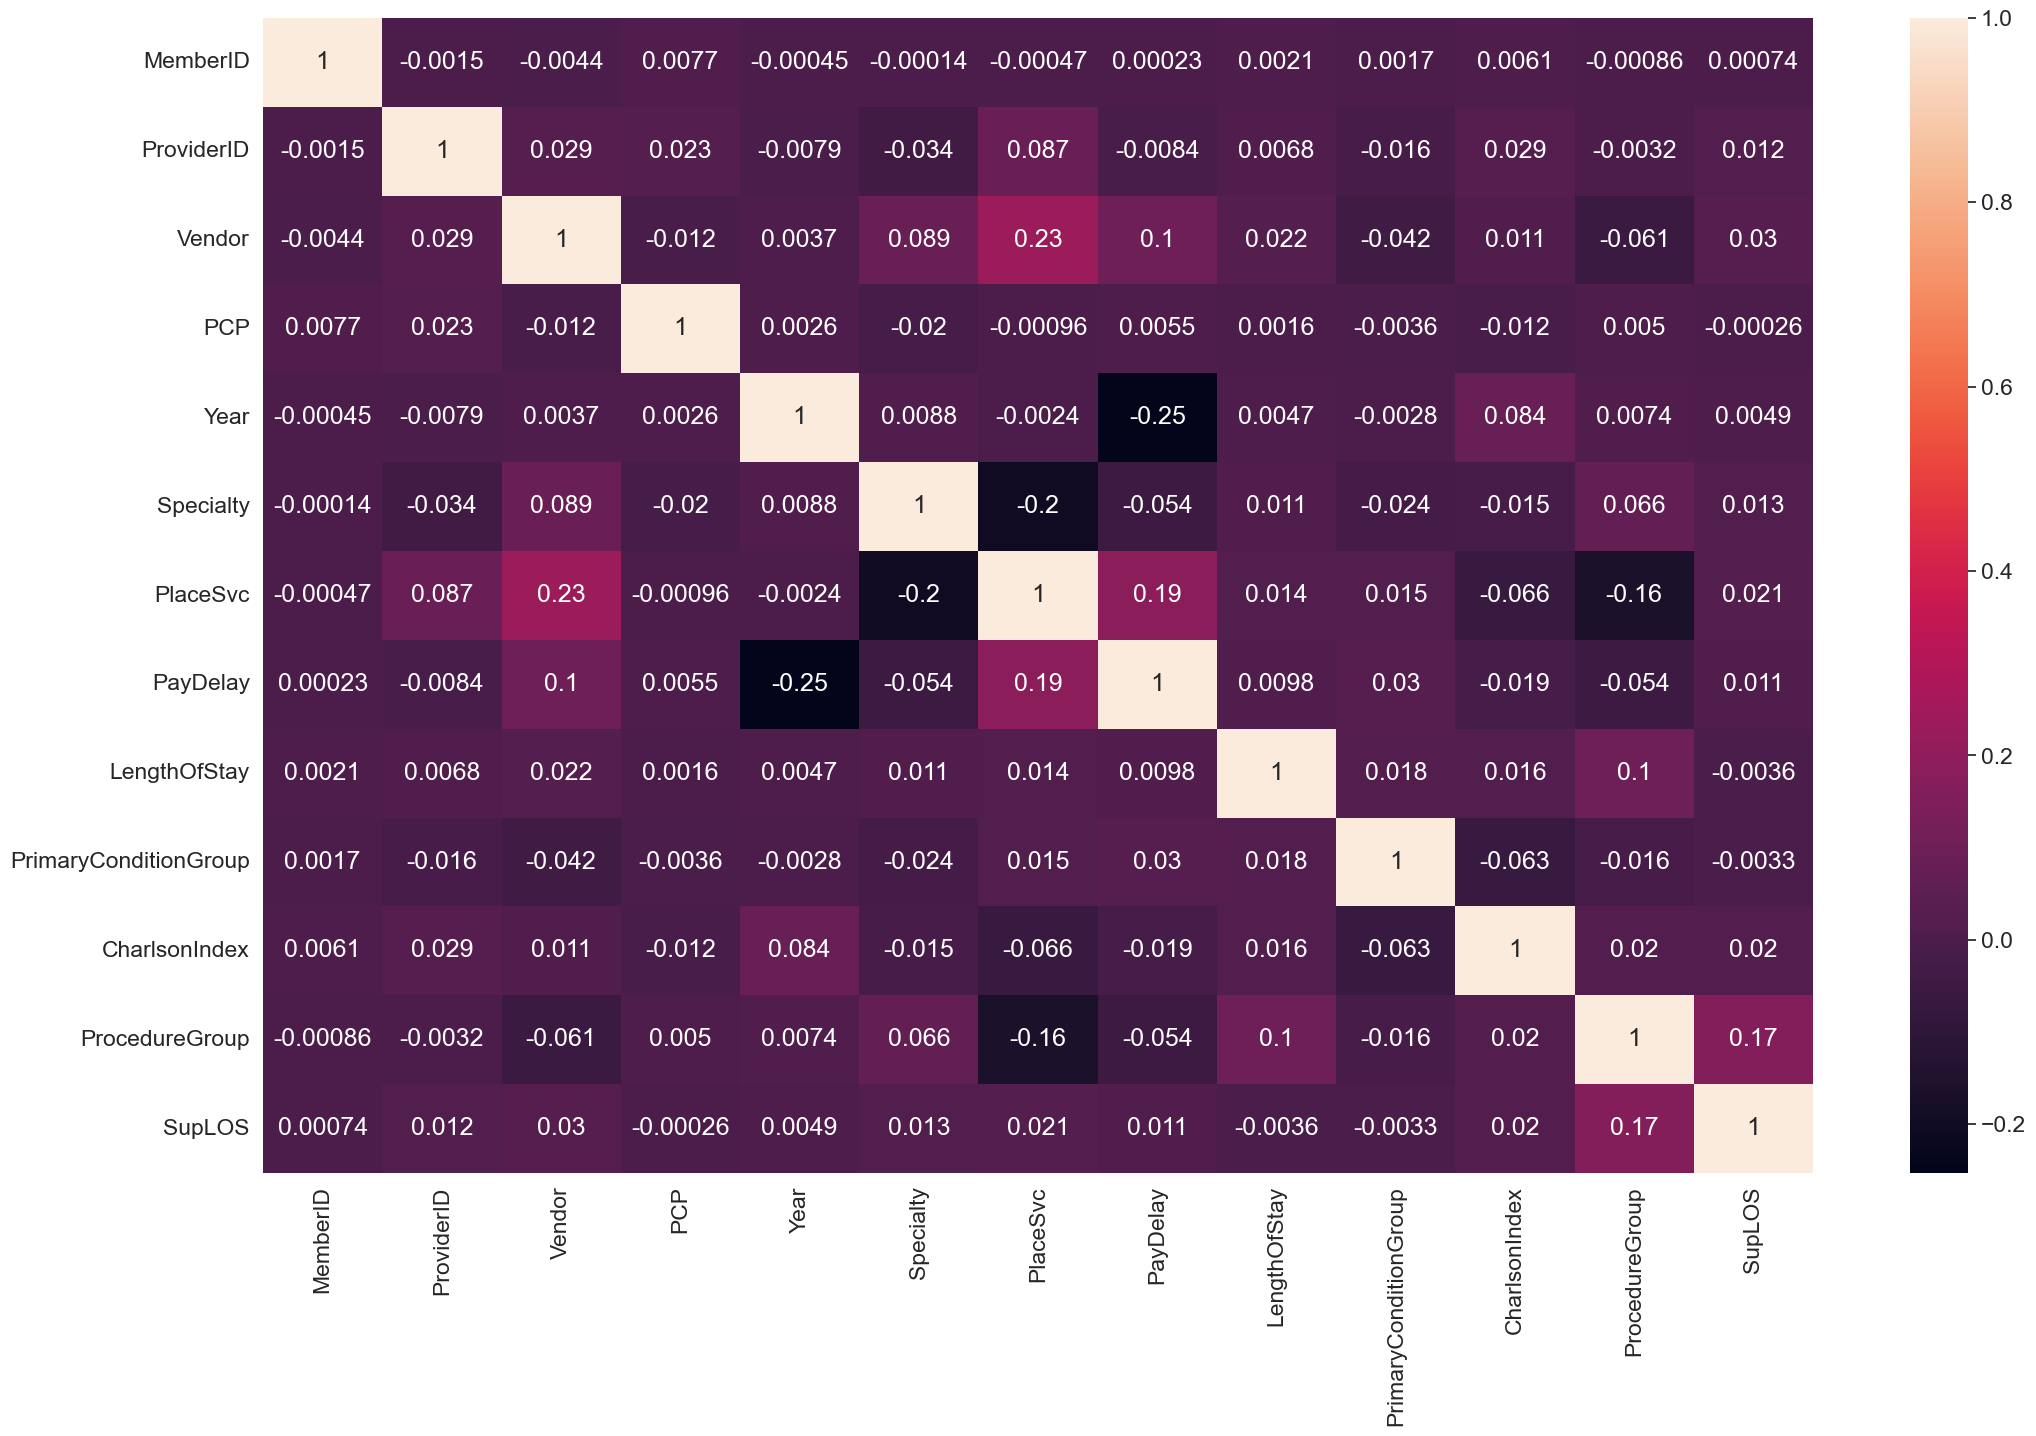

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot=True)

Next we are loading in the days in hospital data

In [63]:
days_y2 = pd.read_csv("HeritageHealth/HHP_release3/DaysInHospital_Y2.csv")
days_y2

,MemberID,ClaimsTruncated,DaysInHospital
0,24027423,0,0
1,98324177,0,0
2,33899367,1,1
3,5481382,0,1
4,69908334,0,0
...,...,...,...
76033,1702326,0,0
76034,31530440,0,0
76035,87102780,0,0
76036,74032946,0,0


In [58]:
days_y3 = pd.read_csv("HeritageHealth/HHP_release3/DaysInHospital_Y3.csv")
days_y3

,MemberID,ClaimsTruncated,DaysInHospital
0,90963501,0,0
1,85160905,0,0
2,45496648,0,0
3,45162557,0,0
4,68793937,0,0
...,...,...,...
71430,206785,0,0
71431,93465383,0,0
71432,57466586,0,0
71433,57283229,0,0


We are also looking at the members data. This table consists of three feautres: MemberID, AgeAtFirstClaim and Sex.

In [60]:
members = pd.read_csv("HeritageHealth/HHP_release3/Members.csv")
members.isna().sum()

MemberID               0
AgeAtFirstClaim     5753
Sex                17552
dtype: int64

What we can see it that we have many missing values for both AgeAtFirstClaim and Sex. 

## Training model

Splitting the data into training and test data

In [61]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(claims, claims["PayDelay"], test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NameError: name 'claims' is not defined

Creating a simple linear model

In [51]:
from sklearn.linear_model import LinearRegression

# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values